<h2>Removing inconclusive kickstarters SVM Analysis</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.svm import NuSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
pd.set_option('display.max_columns', None)

In [2]:
filename = '/final_inconclusive_eliminated.csv'
filepath = '/Users/zarahtaufique/Desktop/SJSU/Year4Semester2/CMPE188/kickstarter-project-success-predictions/data'
pd.set_option('display.max_columns', None)

starter_df = pd.read_csv(filepath+filename, low_memory=False)
print(starter_df.columns)

Index(['goal', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
       'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month',
       'created_at_day', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'TOPCOUNTRY', 'LaunchedTuesday',
       'DeadlineWeekend', 'name', 'blurb', 'disable_communication', 'country',
       'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'category', 'SuccessfulBool', 'app', 'help', 'new', 'world',
       'country_grouped_CA', 'country_grouped_GB', 'country_grouped_Other',
       'country_grouped_US', 'currency_grouped_CAD', 'currency_grouped_EUR',
       'currency_grouped_GBP', 'currency_grouped_Other',
       'currency_grouped_USD', 'deadline_weekday_Friday',
       'deadline_weekday_Monday', 'deadline_weekday_Saturday',
       'deadline_weekday_Sunday', 'deadl

In [3]:
# Dropping columns before training
cols_to_drop = [
    'name',
    'blurb',
    'category',
    'country',
    'currency',
    'deadline',
    'state_changed_at',
    'created_at',
    'launched_at',
    'launch_to_state_change',
    'create_to_launch',
    'launch_to_deadline',
    'currency_grouped',
    'category_grouped',
    'country_grouped',
    'spotlight',
    'usd_pledged', 
    'staff_pick', 
    'backers_count'
]

def safe_drop_columns(df, features_to_drop):
    for column in features_to_drop:
        if column in df.columns.tolist():
            df.drop(column, axis=1, inplace=True)
safe_drop_columns(starter_df, cols_to_drop)
print(starter_df.head())

       goal  static_usd_rate  name_len_clean  blurb_len_clean  deadline_month  \
0 -0.062759        -0.187647               1                0       -1.718418   
1 -0.063488        -0.187647               0                0       -0.536059   
2  0.009024        -0.187647               1                0       -1.127239   
3 -0.060208        -0.187647               0                0        0.941889   
4 -0.061504         0.312900               0                1       -0.240470   

   deadline_day  deadline_hr  created_at_month  created_at_day  created_at_hr  \
0      0.807799    -0.488252           1.36854        1.534993       1.569253   
1     -1.621762     0.502382          -1.37088        0.509481      -0.627839   
2      1.139103    -0.818463          -1.67526        0.965264      -2.148903   
3     -1.069589    -2.139309           0.75978       -1.199705       1.569253   
4      1.249538    -0.158041          -0.45774        1.079210       0.217197   

   launched_at_month  laun

In [4]:
print(starter_df.dtypes)

goal                          float64
static_usd_rate               float64
name_len_clean                  int64
blurb_len_clean                 int64
deadline_month                float64
                               ...   
category_grouped_Other          int64
category_grouped_Plays          int64
category_grouped_Software       int64
category_grouped_Wearables      int64
category_grouped_Web            int64
Length: 73, dtype: object


In [5]:
# All input features
X = starter_df.drop('SuccessfulBool', axis=1)

# Get the output
Y = starter_df['SuccessfulBool']

In [6]:
# Using the best performing models from original SVM analysis
models = [
    ('RBF SVC', SVC(kernel='rbf', C=1000, gamma='scale', random_state=42)),
    ('LinearSVC', LinearSVC(C=10, random_state=42)),
    ('Poly SVC', SVC(kernel='poly', degree=2, C=1000, random_state=42)),
]

In [7]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} accuracy (±{cv_results.std():.4f})")

RBF SVC: 0.6955 accuracy (±0.0032)
LinearSVC: 0.7094 accuracy (±0.0093)
Poly SVC: 0.6729 accuracy (±0.0044)


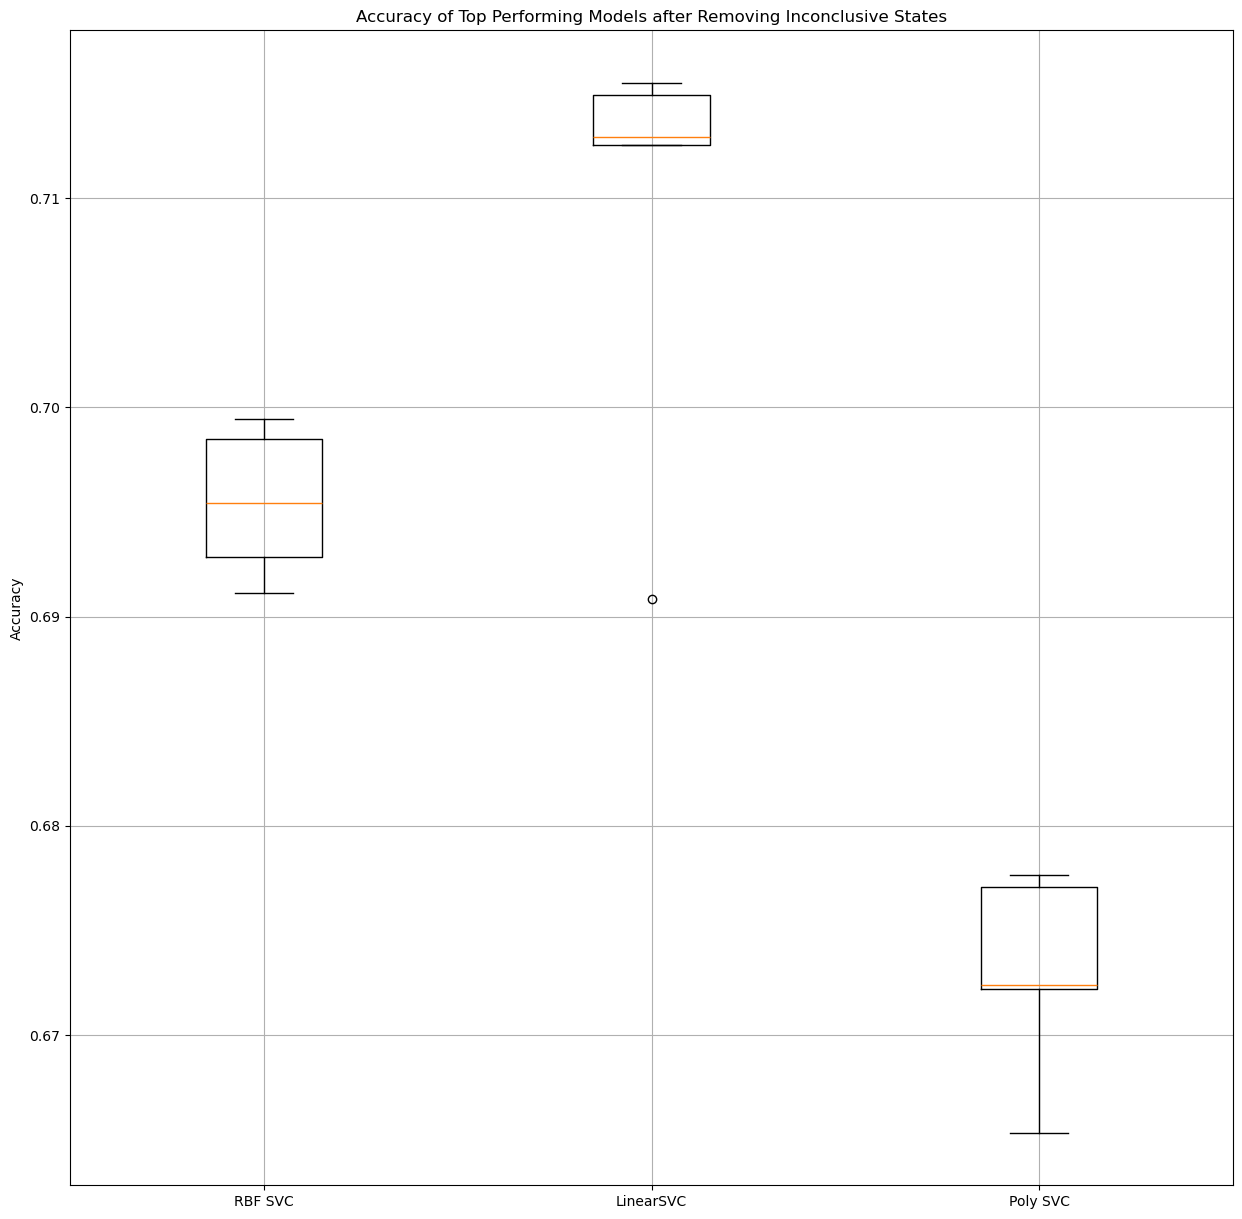

In [8]:
plt.figure(figsize=(15, 15))
plt.boxplot(results)
plt.title('Accuracy of Top Performing Models after Removing Inconclusive States')
plt.ylabel('Accuracy')
all_names =names
plt.xticks(range(1, len(all_names) + 1), all_names)
plt.grid(True)
plt.show()

<h3>Dropping Low Importance Features</h3>

In [9]:
new_starter_df = starter_df

new_starter_df.drop(['TOPCOUNTRY', 
                 'LaunchedTuesday', 
                 'DeadlineWeekend', 
                 'disable_communication', 
                 'app', 
                 'help', 
                 'new', 
                 'world', 
                 'country_grouped_CA', 
                 'country_grouped_GB', 
                 'country_grouped_Other', 
                 'country_grouped_US', 
                 'currency_grouped_CAD', 
                 'currency_grouped_EUR', 
                 'currency_grouped_GBP', 
                 'currency_grouped_Other', 
                 'currency_grouped_USD', 
                 'deadline_weekday_Friday', 
                 'deadline_weekday_Monday', 
                 'deadline_weekday_Saturday', 
                 'deadline_weekday_Sunday', 
                 'deadline_weekday_Thursday', 
                 'deadline_weekday_Tuesday', 
                 'deadline_weekday_Wednesday', 
                 'state_changed_at_weekday_Friday', 
                 'state_changed_at_weekday_Monday', 
                 'state_changed_at_weekday_Saturday', 
                 'state_changed_at_weekday_Sunday', 
                 'state_changed_at_weekday_Thursday', 
                 'state_changed_at_weekday_Tuesday', 
                 'state_changed_at_weekday_Wednesday', 
                 'created_at_weekday_Friday', 
                 'created_at_weekday_Monday', 
                 'created_at_weekday_Saturday', 
                 'created_at_weekday_Sunday', 
                 'created_at_weekday_Thursday', 
                 'created_at_weekday_Tuesday', 
                 'created_at_weekday_Wednesday', 
                 'launched_at_weekday_Friday', 
                 'launched_at_weekday_Monday', 
                 'launched_at_weekday_Saturday', 
                 'launched_at_weekday_Sunday', 
                 'launched_at_weekday_Thursday', 
                 'launched_at_weekday_Tuesday', 
                 'launched_at_weekday_Wednesday', 
                 'category_grouped_Apps', 
                 'category_grouped_Festivals', 
                 'category_grouped_Gadgets', 
                 'category_grouped_Hardware', 
                 'category_grouped_Musical', 
                 'category_grouped_Wearables'], inplace=True, axis=1)

# All input features
new_X = starter_df.drop('SuccessfulBool', axis=1)

# Get the output
new_Y = starter_df['SuccessfulBool']

In [10]:
# Using the best performing models from original SVM analysis
models = [
    ('RBF SVC', SVC(kernel='rbf', C=1000, gamma='scale', random_state=42)),
    ('LinearSVC', LinearSVC(C=10, random_state=42)),
    ('Poly SVC', SVC(kernel='poly', degree=2, C=1000, random_state=42)),
]

In [11]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} accuracy (±{cv_results.std():.4f})")

RBF SVC: 0.6955 accuracy (±0.0032)
LinearSVC: 0.7094 accuracy (±0.0093)
Poly SVC: 0.6729 accuracy (±0.0044)


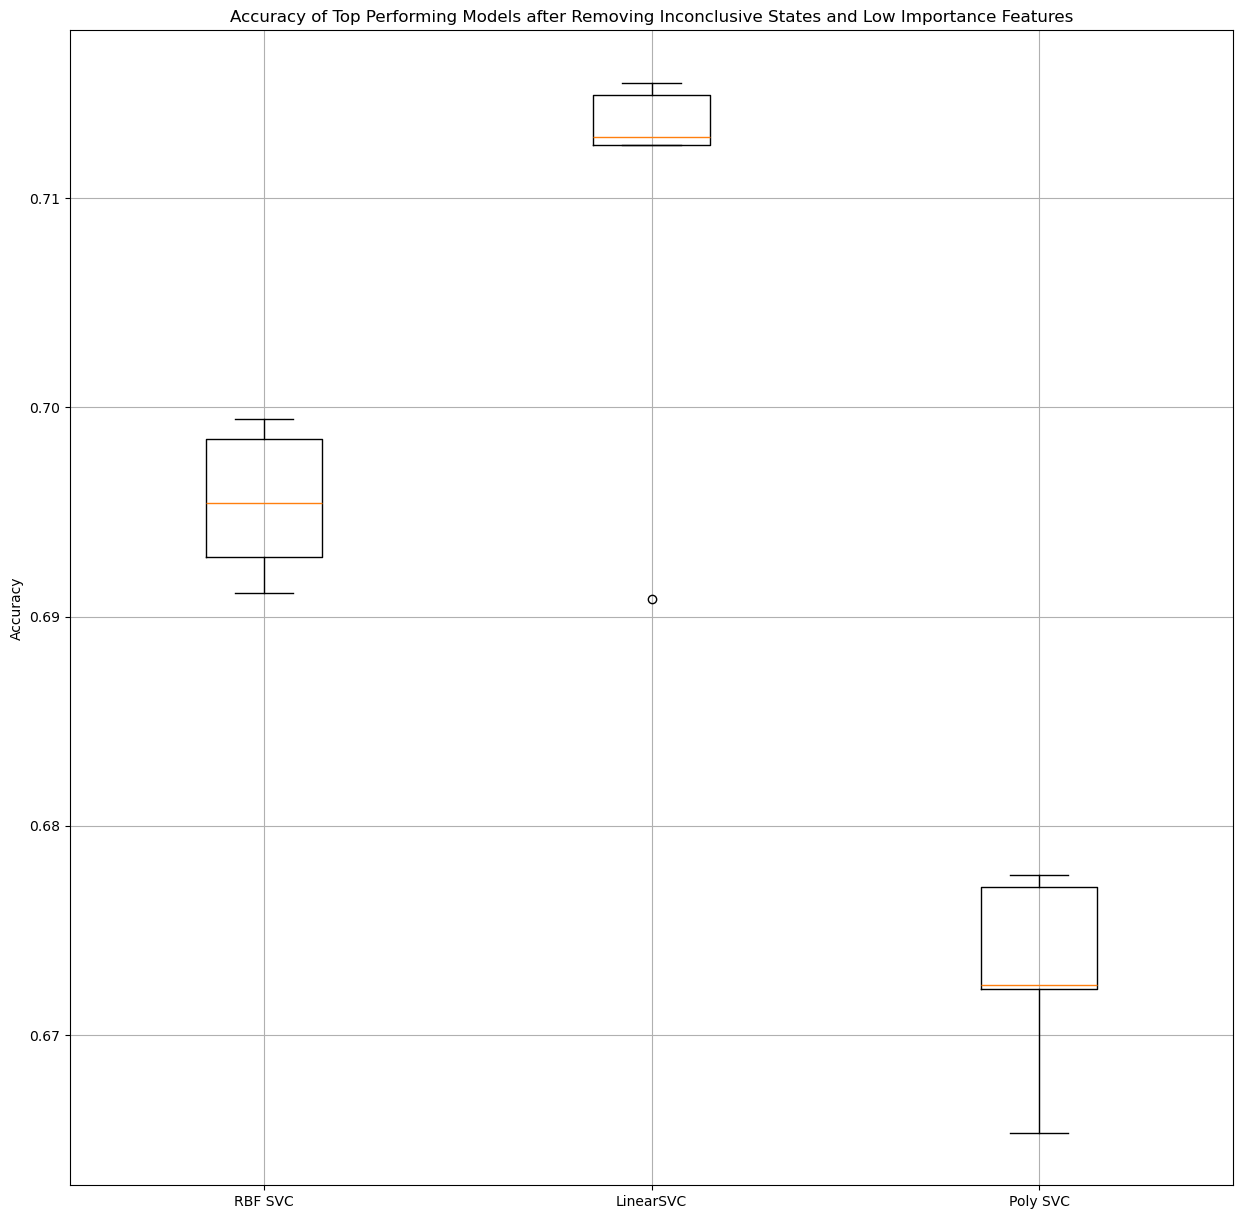

In [12]:
plt.figure(figsize=(15, 15))
plt.boxplot(results)
plt.title('Accuracy of Top Performing Models after Removing Inconclusive States and Low Importance Features')
plt.ylabel('Accuracy')
all_names =names
plt.xticks(range(1, len(all_names) + 1), all_names)
plt.grid(True)
plt.show()